In [1]:
# Import Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import shap
import warnings

from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # MICE imputer

sns.set(style="whitegrid")

# Makes sure we see all columns
pd.set_option('display.max_columns', None)

# ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data from the csv file and display it in the notebook with the first row as the header

data = pd.read_csv("data/BST_V1toV10.csv", header=0, sep=";")
data.head()


,VAGUE,Q1,Q2,STATUTTV,SECTEUR,TAILLE,Q4_3A6,Q4_7A12,Q4_13A17,Q4_SUP18,Q5,EVACTENT,Q9,Q10,Q12,Q13_1,Q13_2,Q13_4,Q13_5,Q13_6,Q13_7,Q14_1,Q14_2,Q14_3,Q14_4,Q15_1,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q15_17,Q15_18,Q15_19,EVRYTHM,Q16_3,Q16_4,Q17_1,Q17_3,Q17_4,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q19_9,Q19_10,Q19_11,Q19_12,Q19_13,Q19_14,Q19_15,Q19_16,Q19_17,Q22_1,Q22_2,Q22_3,Q22_4,Q22_5,Q23_1,Q25,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q34_1,Q34_2,Q34_3,Q34_4,Q37,Q38_1,Q38_2,Q40M3JR,Q403A5JR,Q401SEMR,Q40SU1MR,Q40SU3M,Q42,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q57,Q58_1,Q58_2,Q60,Q61,Q62,Q63_1,Q63_2
0,1,2.0,NaN,4.0,1.0,3.0,0.0,0.0,0.0,0.0,2.0,NaN,1.0,2.0,4.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,3.0,NaN,2.0,3.0,4.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,2.0,2.0,1,2,1,1,1,1.0,2.0,2.0,2.0,3.0,2.0,NaN,5.0,4.0,4.0,2.0,1.0,1.0,3.0,3.0
1,1,2.0,NaN,3.0,3.0,3.0,0.0,0.0,0.0,0.0,2.0,NaN,1.0,2.0,2.0,4.0,3.0,2.0,1.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,2.0,2.0,1,2,1,1,1,2.0,3.0,2.0,3.0,1.0,2.0,NaN,1.0,2.0,3.0,2.0,1.0,1.0,3.0,2.0
2,1,2.0,NaN,3.0,3.0,3.0,2.0,0.0,0.0,0.0,2.0,NaN,1.0,2.0,2.0,3.0,3.0,3.0,1.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,2.0,2.0,1,1,1,1,1,NaN,3.0,2.0,2.0,2.0,2.0,NaN,2.0,3.0,2.0,2.0,1.0,1.0,3.0,3.0
3,1,2.0,NaN,3.0,3.0,4.0,0.0,0.0,0.0,0.0,2.0,NaN,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,1.0,2.0,1,1,1,1,1,NaN,3.0,2.0,3.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,1.0,1.0,3.0,3.0
4,1,2.0,NaN,2.0,3.0,3.0,0.0,0.0,2.0,2.0,2.0,NaN,1.0,2.0,1.0,4.0,4.0,4.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,2.0,2.0,1,1,1,1,1,NaN,2.0,2.0,1.0,2.0,1.0,NaN,4.0,3.0,3.0,2.0,1.0,1.0,2.0,2.0


In [3]:
# get column names from colNames.csv

colNames = pd.read_csv("data/colNames.csv", sep=";", header=0, index_col=0, encoding='MacRoman' )
colNames.head()

,VAGUE,Q1,Q2,STATUTTV,SECTEUR,TAILLE,Q4_3A6,Q4_7A12,Q4_13A17,Q4_SUP18,Q5,EVACTENT,Q9,Q10,Q12,Q13_1,Q13_2,Q13_4,Q13_5,Q13_6,Q13_7,Q14_1,Q14_2,Q14_3,Q14_4,Q15_1,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q15_17,Q15_18,Q15_19,EVRYTHM,Q16_3,Q16_4,Q17_1,Q17_3,Q17_4,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q19_9,Q19_10,Q19_11,Q19_12,Q19_13,Q19_14,Q19_15,Q19_16,Q19_17,Q22_1,Q22_2,Q22_3,Q22_4,Q22_5,Q23_1,Q25,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q34_1,Q34_2,Q34_3,Q34_4,Q37,Q38_1,Q38_2,Q40M3JR,Q403A5JR,Q401SEMR,Q40SU1MR,Q40SU3M,Q42,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q57,Q58_1,Q58_2,Q60,Q61,Q62,Q63_1,Q63_2,outcome
Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Q_En,YEAR MMS,Q1- Your sex?,Q2- How old are you?,STATUS,In which sector of activity do you work?,"What is the size of your business (in total, a...",Q4- (3 to 6 years old) In each of the followin...,Q4- (7 to 12 years old) In each of the followi...,Q4- (13 to 17 years old) In each of the follow...,Q4- (18 years and over) In each of the followi...,"Q5- Apart from your children, do you have a de...","Would you say that over the last 12 months, yo...",Q9- Are you working?,Q10- Do you have shift work (work organized in...,Q12- Do you work most often?,Q13- Is the performance of your work taxing on...,Q13- Is the performance of your work taxing on...,Q13- Is the performance of your work taxing on...,Q13- Is the performance of your work taxing on...,Q13- Is the performance of your work taxing on...,Q13- Is the performance of your work taxing on...,"Q14- During your work, are you in a situation?...","Q14- During your work, are you in a situation?...","Q14- During your work, are you in a situation?...","Q14- During your work, are you in a situation?...",Q15- Indicate whether each of the following se...,Q15- Indicate whether each of the following se...,Q15- Indicate whether each of the following se...,Q15- Indicate whether each of the following se...,Q15- Indicate whether each of the following se...,Q15- Indicate whether each of the following se...,Q15- Indicate whether each of the following se...,Q15- Indicate whether each of the following se...,Q15- Indicate whether each of the following se...,Q15- Indicate whether each of the following se...,Q15- Indicate whether each of the following se...,Q15- Indicate whether each of the following se...,Q15- Indicate whether each of the following se...,Q15- Indicate whether each of the following se...,Q15- Indicate whether each of the following se...,Q15- Indicate whether each of the following se...,"Would you say that over the last 12 months, yo...",Q16- And for each of these sentences?-I would ...,Q16- And for each of these sentences?-I am pro...,"Q17- At work, does it happen to you: (D-have d...","Q17- At work, does it happen to you: (D-e rece...","Q17- At work, does it happen to you: (D-being ...",Q19- For each of the following points indicate...,Q19- For each of the following points indicate...,Q19- For each of the following points indicate...,Q19- For each of the following points indicate...,Q19- For each of the following points indicate...,Q19- For each of the following points indicate...,Q19- For each of the following points indicate...,Q19- For each of the following points indicate...,Q19- For each of the following points indicate...,Q19- For each of the following points indicate...,Q19- For each of the following points indicate...,Q19- For each of the following points indicate...,Q19- For each of the following points indicate...,Q19- For each of the following points indicate...,Q19- For each of the following points indicate...,Q19- For each of the following points indicate...,Q19- For each of the following points indicate...,Q22- Over the last 12 months have you personal...,Q22- Over the last 12 months have you personal...,Q22- Over the last 12 months have you personal...,Q22- Over the last 12 months have you personal...,Q22- Over the last 

In [4]:
# Change "Age" to categories

# - Some of the data was in categories and some were in numerical.
# - Take the vales that are in numerical and change them to the given categories

#     - 1 - Under 30
#     - 2 - 30 to 39 years old
#     - 3 - 40 to 44 years old
#     - 4 - 45 to 49 years old
#     - 5 - 50 to 55 years old
#     - 6 - 56 years and over
#     - 7 - No response

for i in range(len(data["Q2"])):
    if data["Q2"][i] > 17:
        if data["Q2"][i] > 16 and data["Q2"][i] < 29.9:
            data['Q2'][i] = 1
        elif data["Q2"][i] > 29.9 and data["Q2"][i] < 39.9:
            data['Q2'][i] = 2
        elif data["Q2"][i] > 39.9 and data["Q2"][i] < 44.9:
            data['Q2'][i] = 3
        elif data["Q2"][i] > 44.9 and data["Q2"][i] < 49.9:
            data['Q2'][i] = 4
        elif data["Q2"][i] > 49.9 and data["Q2"][i] < 55.9:
            data['Q2'][i] = 5
        elif data["Q2"][i] > 55.9 and data["Q2"][i] < float('inf'):
            data['Q2'][i] = 6

In [5]:
# Systematic error in some of Q22 correction

sys_err_cols = [
    "Q22_2",
    "Q22_3",
    "Q22_4",
    "Q22_5"
]

# Correct the systematic in the sys_err_cols coloumns by going through each coloumn and then each value and increasing the value by 1

for col in sys_err_cols:
    for i in range(len(data[col])):
        data[col][i] = data[col][i] + 1

In [6]:
# Results columns categorisation and create a new column called outcome

# Very Short Sick Leave: 1
# Short Sick Leave: 2
# Long Sick Leave: 3

vShort_column = [
    'Q40M3JR'
    ]

short_columns = [
    'Q403A5JR',
    'Q401SEMR'
    ]

long_columns = [
    'Q40SU1MR',
    'Q40SU3M'
    ]

# create the outcome column in the dataset and set all values to 0
data['outcome'] = 0

for i in range(len(data[long_columns[0]])):
    for j in range(len(long_columns)):
        if data[long_columns[j]][i] == 2:
            data['outcome'][i] = 3  # Long Sick Leave
            break

    if data['outcome'][i] == 3:
        continue
    
    for k in range(len(short_columns)):
        if data[short_columns[k]][i] == 2:
            data['outcome'][i] = 2 # Short Sick Leave
            break
    
    if data['outcome'][i] == 2:
        continue

    if data[vShort_column[0]][i] == 2:
        data['outcome'][i] = 1 # Very Short Sick Leave
        continue

    # if does not fall into any of the above categories, set the value to NaN
    else:
        data['outcome'][i] = None


### MICE to fill NaN data

In [7]:
imputer = IterativeImputer(random_state=100, max_iter=10)

def mice(columns, clip=False):
    # train
    df_train = data.loc[:, columns]
    # fit
    imputer.fit(df_train)
    # transform
    df_imputed = imputer.transform(df_train)
    df_imputed = pd.DataFrame(df_imputed, columns=columns).round()

    if clip:
        df_imputed = df_imputed.clip(lower=1)

    # replace the original dataset with the imputed dataset
    data.loc[:, columns] = df_imputed

    return 0

In [8]:
# Change the column names and add the correct values

long_names = colNames.loc['Q_En']

# Step 2: Replace the response numbers in data with the corresponding responses from colNames
# Iterate over each column in data
for col in data.columns:

    mice([col])

    # Skip the columns that start with 'Q4_' and VAGUE
    if col.startswith('Q4_') or col == 'VAGUE':
        continue
    
    # Create a mapping from colNames for the current column
    mapping = colNames[col].dropna()[1:].to_dict()  # Drop the first row and NaNs, then convert to a dictionary
    # Convert the keys of the mapping dictionary to integers (since the responses in data are numbers)
    mapping = {int(k): v for k, v in mapping.items()}
    # Replace the values in data with the mapped values
    data[col] = data[col].map(mapping)
    
data.columns = long_names

In [9]:
# save the results coloumn names into a variable
results_cols = [
    "MONS ARRESTS FOR 3 DAYS",
    "STOPS OF 3 TO 5 DAYS",
    "STOPS OF MORE THAN 1 WEEK",
    "ARRESTS OF MORE THAN 1 MONTH",
    "(V5 V9) Sick leave of more than 3 months"
    ]

# drop the columns that were used to create the outcome column
data.drop(results_cols, axis=1, inplace=True)

### Analyse the initial dataset

In [10]:
# Details of the data
print(data.shape)
data.describe()

(44535, 100)


Q_En,YEAR MMS,"Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?"
count,44535.000000,44535.000000,44535.000000,44535.000000,44535.000000
mean,5.725250,0.196969,0.262064,0.207971,0.220097
std,2.753581,0.488016,0.590041,0.514307,0.582692
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,9.000000,9.000000,9.000000,9.000000


In [11]:
#Remove the "YEAR MMS" coloumn as it is not needed

data.drop("YEAR MMS", axis=1, inplace=True)

In [12]:
# Categorical data conversion

# non-catagorical columns
not_to_cat = [
    "Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?",
    "outcome"
]

# catagorical columns (everything other than the non_categorical columns)
categorical_cols = [col for col in data.columns if col not in not_to_cat]
encoded = pd.get_dummies(data[categorical_cols], 
                                prefix=categorical_cols)

data = pd.concat([encoded, data], axis=1)
data.drop(categorical_cols, axis=1, inplace=True)

    

In [13]:
# Q4 having large values

q4 = [
    "Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?"
]

# count the values of each of the columns
for i in q4:
    print(data[i].value_counts())

0.0    37329
1.0     5798
2.0     1284
3.0      102
4.0       15
5.0        5
9.0        1
6.0        1
Name: Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?, dtype: int64
0.0    35729
1.0     6315
2.0     2199
3.0      258
4.0       21
9.0        5
7.0        3
8.0        3
5.0        2
Name: Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?, dtype: int64
0.0    37198
1.0     5620
2.0     1547
3.0      151
4.0       14
9.0        2
8.0        2
5.0        1
Name: Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?, dtype: int64
0.0    37713
1.0     4426
2.0     1923
3.0      391
4.0       69
5.0        7
6.0        2
9.0        2
8.0        2
Name: Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?, dtype: int64


### SHAP

In [14]:
import shap

from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

In [15]:
# Split the data for training and evaluation

X = data.drop('outcome', axis=1, inplace=False)
y = data['outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [16]:
# Fit RF (blackbox) model
sl = RandomForestClassifier()
sl.fit(X_train, y_train)
y_pred = sl.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.3286629322756492
Accuracy 0.8194678342876389


In [17]:
explainer = shap.TreeExplainer(sl)
# Calculate shapley values for test data
start_index = 0
end_index = 10
shap_values = explainer.shap_values(X_test[start_index:end_index])
# X_test[start_index:end_index]

In [18]:
# y_test[start_index:end_index]

In [19]:
print(shap_values[0].shape)
shap_values

(345, 3)


array([[[ 4.61287463e-04, -8.57043247e-04,  3.95755784e-04],
        [ 1.36335429e-04, -1.23939880e-03,  1.10306337e-03],
        [ 8.26447052e-04,  3.58356157e-04, -1.18480321e-03],
        ...,
        [-2.62421767e-04,  2.62592744e-04, -1.70977920e-07],
        [-7.72330236e-04, -2.83766934e-04,  1.05609716e-03],
        [ 7.01678895e-04,  6.80695814e-03, -7.50863703e-03]],

       [[ 8.88728884e-04, -4.65006288e-03,  3.76133400e-03],
        [ 4.50434092e-04, -4.21750395e-03,  3.76706985e-03],
        [ 2.15144963e-04,  9.53982491e-04, -1.16912745e-03],
        ...,
        [-6.11165319e-04,  4.02359800e-04,  2.08805517e-04],
        [-1.50467565e-04,  3.38321695e-04, -1.87854132e-04],
        [-4.02648470e-04,  4.61809909e-04, -5.91614415e-05]],

       [[-4.61316969e-04, -4.14748152e-04,  8.76065121e-04],
        [ 5.67071905e-04, -7.86608918e-04,  2.19537012e-04],
        [ 3.34452013e-04,  2.29964915e-03, -2.63410116e-03],
        ...,
        [-1.82811986e-04,  4.57252845e-04,

In [20]:
shap.initjs()
# Force plot
prediction = sl.predict(X_test[start_index:end_index])[9]
print(f"The sl predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[...,1],
                X_test[start_index:end_index])  # for values


The sl predicted: Short Leave


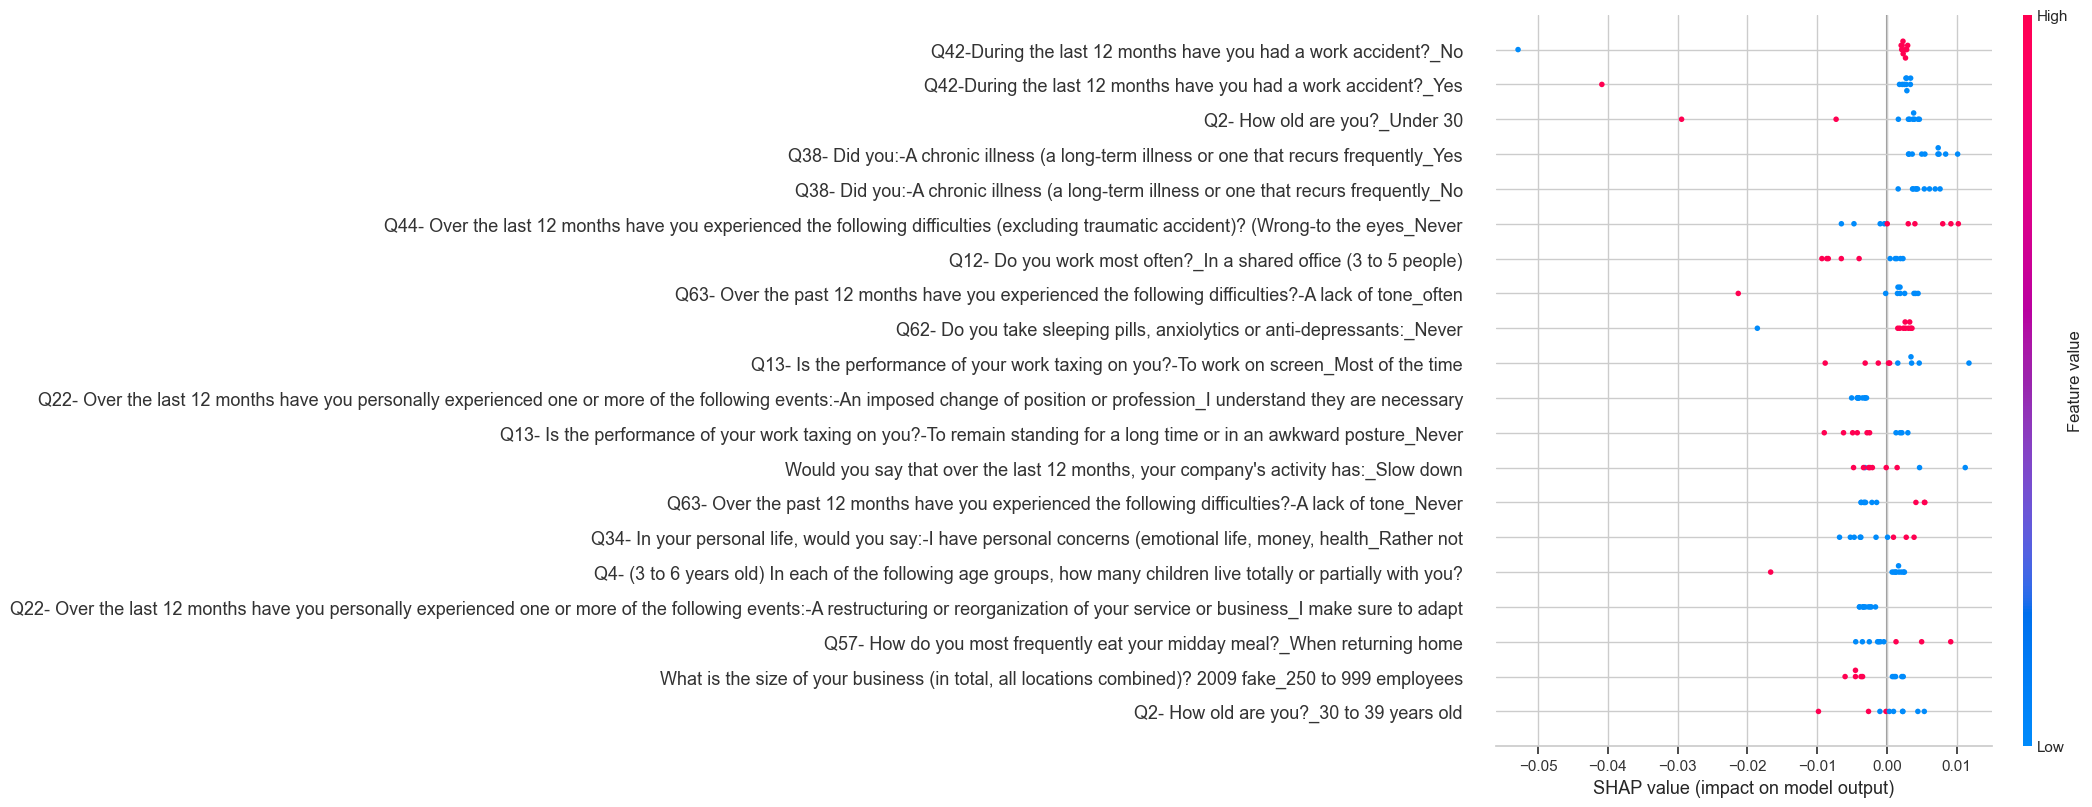

In [21]:
shap.summary_plot(shap_values[...,1], X_test[start_index:end_index])